In [1]:
# Import relevant libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
import os

path = '/kaggle/input/ufo-sightings'
dir_list = os.listdir(path)

 
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

Files and directories in ' /kaggle/input/ufo-sightings ' :
['ufo-sightings-transformed.csv']


In [3]:
# Load data into a dataframe

df = pd.read_csv(path + '/ufo-sightings-transformed.csv')

In [4]:
# See first 5 rows of data

df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [5]:
# Name & datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   80328 non-null  int64  
 1   Date_time                    80328 non-null  object 
 2   date_documented              80328 non-null  object 
 3   Year                         80328 non-null  int64  
 4   Month                        80328 non-null  int64  
 5   Hour                         80328 non-null  int64  
 6   Season                       80328 non-null  object 
 7   Country_Code                 80069 non-null  object 
 8   Country                      80069 non-null  object 
 9   Region                       79762 non-null  object 
 10  Locale                       79871 non-null  object 
 11  latitude                     80328 non-null  float64
 12  longitude                    80328 non-null  float64
 13  UFO_shape       

In [6]:
# Check missing values
df.isnull().sum()

Unnamed: 0                        0
Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
dtype: int64

Lots of null vlaues for UFO_shape

## **Exploring of data**

In [7]:
# Make new df with columns we are interested in

new_columns = [
    'Year','Date_time','date_documented',
    'Month','Hour','latitude',
    'longitude'
]

df2 = []
df2 = df[new_columns].sort_values(by=['Year'])
df2.head()


,Year,Date_time,date_documented,Month,Hour,latitude,longitude
7863,1906,1906-11-11 00:00:00,12/23/2002,11,0,48.208174,16.373819
46855,1910,1910-06-01 15:00:00,4/16/2005,6,15,32.709167,-96.008056
10580,1910,1910-01-01 00:00:00,9/15/2005,1,0,40.194722,-92.583056
40273,1916,1916-04-05 13:00:00,3/9/2004,4,13,46.227638,2.213749
46691,1920,1920-06-11 21:00:00,5/12/2009,6,21,40.123889,-86.013333


### **Plot the amount of times a year an incident is reported**

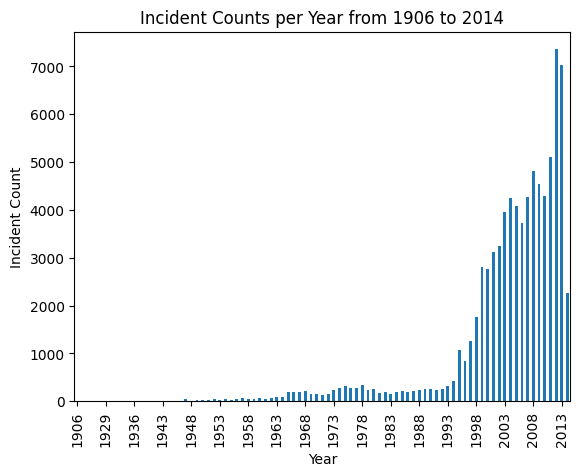

In [8]:
df3 = []
df3 = df2['Year'].value_counts().sort_index()

ax = df3.plot(kind='bar')

# Show every 5th x-tick
X_TICKS = 5
plt.xticks(range(0, len(ax.get_xticklabels()), X_TICKS), 
           ax.get_xticklabels()[::X_TICKS], rotation = 90)
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.title('Incident Counts per Year from ' + str(min(df2['Year'])) +
         ' to ' + str(max(df2['Year'])))
plt.show()

We see from the barplot that there is an increase in incidents reported as time goes on, the most from the data set being from the year 2012

### **Show what time of day has the most incidents reported**

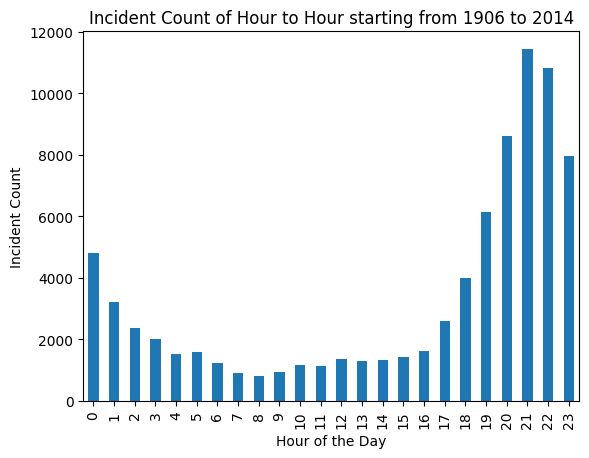

In [9]:
df4 = []
df4 = df2['Hour'].value_counts().sort_index()

ax = df4.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Incident Count')
plt.title('Incident Count of Hour to Hour starting from ' + 
          str(min(df2['Year'])) +
         ' to ' + str(max(df2['Year'])))
plt.show()


More reports are made in the later part of the day (the most reports happening around 9 PM) when visibility of the sky is higher than during the day.

### **Show which months has the most incidents reported**

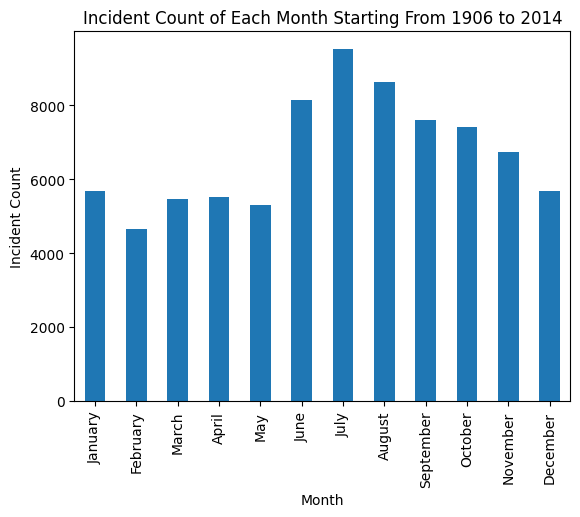

In [10]:
df5 = []
df5 = df2['Month'].value_counts().sort_index()

ax = df5.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.title('Incident Count of Each Month Starting From ' + 
          str(min(df2['Year'])) +
         ' to ' + str(max(df2['Year'])))

# change xticklabels to months
new_x_labels = [
    'January', 'February', 'March',
    'April', 'May', 'June',
    'July', 'August', 'September',
    'October', 'November', 'December'
]

ax.set_xticklabels(new_x_labels)

plt.show()

With the longer days and more pleasant nights, it makes sense that July would have more incidents reported.

### **Create a heatmap that shows where incidents are reported**

In [11]:
map_obj = folium.Map(width='100%', height='100%',max_bounds=True)

In [12]:
HeatMap(data=df2[['latitude','longitude']].groupby([
    'latitude','longitude']).sum().reset_index().values.tolist(), 
        radius=7, max_zoom=10).add_to(map_obj)

map_obj